In [ ]:
#Listing 2.1 Creating a simple tabular dataset

import pandas as pd
data = {'gender': ['male', 'female', 'male', 'female'],
        'age': [25, 30, 27, 29],
        'education_level': ['Bachelor', 'Master', 'Bachelor', 'PhD'],
        'income': [50000, 60000, 55000, 70000]} #A
index = [ 'Bob ', 'Alice', 'Charlie', 'Emily'] #B
df = pd.DataFrame(data, index=index) #C
print(df)
print(df.iloc[1]) #D
print(df.loc['Alice']) #E

#A create a dictionary of data
#B create a row index
#C create a Pandas dataframe from the dictionary
#D print the row 1
#E print the row whose label is Alice

         gender  age education_level  income
Bob        male   25        Bachelor   50000
Alice    female   30          Master   60000
Charlie    male   27        Bachelor   55000
Emily    female   29             PhD   70000
gender             female
age                    30
education_level    Master
income              60000
Name: Alice, dtype: object
gender             female
age                    30
education_level    Master
income              60000
Name: Alice, dtype: object


In [ ]:
# Listing 2.2 Dropping zero variance features

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold

data = pd.DataFrame({"feature_1":['A' for i in range(15)],
                     "feature_2":['B' if i%2==0 else 'C' for i in range(15)],
                     "feature_3":[i**2 for i in range(15)]})
ord_enc = OrdinalEncoder() #A
data[data.columns] = ord_enc.fit_transform(data)
var_threshold = VarianceThreshold(threshold=0) #B
clean_data = var_threshold.fit_transform(data)
print(var_threshold.variances_) #C
print(clean_data.shape)

#A an ordinal encoder will transform your data from string labels to ordered numeric ones
#B the VarianceThreshold class will filter all feature whose variance is equal or below the selected threshold
#C you can have the variances of all features represented by the .variances_ attribute


[ 0.          0.24888889 14.        ]
(15, 2)


In [ ]:
# Listing 2.3 Finding multicollinear numeric features

import numpy as np
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(0) #A
X, _ = make_classification(n_redundant=0, n_repeated=0, random_state=0) #B
X = np.hstack([X, X[:,:5] + np.random.random((X.shape[0],5))]) #C

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])] #D
print(np.round(vif,2))

for a in range(X.shape[1]): #E
    for b in range(X.shape[1]):
        if a < b:
            r = np.corrcoef(X[:, a], X[:, b])[0][1] #F
            if np.abs(r) > 0.90: #G
                print(f"feature {a} and {b} have r={r:0.3f}")

#A Setting the seed for reproducibility
#B Creating a synthetic dataset: the make_classification command will create a sample dataset of twenty slightly correlated features (see: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
#C Adding more correlated features to the dataset: we pick the first five features and we duplicate them at the end of the dataset after having added some noise (so they are not the same as the original ones)
#D Computing the variance inflation factor (VIF) in order to spot the features that has the least unique contribution
#E Checking for correlated features by iterating through a correlation matrix, we compute only the correlation coefficients of the lower triangle of the matrix
#F The correlation coefficient is computed using the NumPy function np.corcoef (https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)
#G the threshold to report collinearity is evaluated in absolute value (correlation will be negative if a feature is reversed). In addition, depending on the stage of the analysis you can set this to 0.90, 0.95 or even 0.99


[14.98 13.64 11.85 13.12 15.75  1.2   1.41  1.19  1.46  1.31  1.38  1.3
  1.19  1.24  1.63  1.28  1.45  1.23  1.15  1.16 18.86 16.79 15.39 16.45
 17.82]
feature 0 and 20 have r=0.966
feature 1 and 21 have r=0.963
feature 2 and 22 have r=0.947
feature 3 and 23 have r=0.958
feature 4 and 24 have r=0.964


In [ ]:
# Listing 2.4 Merging datasets in pandas

import pandas as pd

df1 = pd.DataFrame({'product_id': [1, 2, 3, 4],
                    'product_name': ['Product A', 'Product B', 'Product C', 'Product D'],
                    'price': [10.99, 20.99, 15.99, 8.99]}) #A
df2 = pd.DataFrame({'product_id': [1, 2, 3, 4],
                    'product_description': ['A great product', 'A high-quality product',
                                            'A reliable product', 'An affordable product'],
                    'category': ['Category A', 'Category B', 'Category C', 'Category D']}) #B
df3 = pd.DataFrame({'product_id': [1, 2, 3, 4],
                    'manufacturer': ['Manufacturer A', 'Manufacturer B',
                                     'Manufacturer C', 'Manufacturer D'],
                    'weight': [1.5, 2.0, 1.8, 1.2]}) #C
merged_df = pd.merge(df1, df2, on='product_id') #D
merged_df = pd.merge(merged_df, df3, on='product_id') #E
print(merged_df)

#A the first table, containing prices
#B the second table, containing descriptions
#C the third table, containing makers and characteristics
#D merging the first two tables
#E merging the previous two joined tables with the third one


In [ ]:
# Listing 2.5 Download of Auto MPG Data Set from UCI repository

from io import StringIO #A
import requests #B
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/"
data = "auto-mpg.data-original"
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight",
           "acceleration", "model_year", "origin", "car_name"] #C
colspecs = [(0, 4), (6, 9), (12, 17), (23, 28), (34, 39),
            (45, 49), (52, 55), (57, 59), (61, -2)] #D
data_ingestion = StringIO(requests.get(url + data).text) #E
data = pd.read_fwf(data_ingestion, colspecs=colspecs, names=columns)

#A StringIO reads and writes an in-memory string buffer
#B Requests is a HTTP library that can help you recover data from the Web
#C We already know the columns names because of the documentation on the UCI machine learning repository
#D Since we are working with fixed width data, we need to provide for each feature, what are its start and end position in the text
#E The dataset is read from the Web by requests.get() and then turned into a string buffer
#F pd.read_fwf reads a table of fixed-width formatted lines into a DataFrame


In [ ]:
# 2.4.2 Examining labels, values, distributions

numeric_feats = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
ordinal_feats = ["cylinders", "model_year"]
categorical_feats = ["origin", "car_name"]

data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.,ford torino


In [ ]:
data.nunique()

mpg             129
cylinders         5
displacement     84
horsepower       92
weight          356
acceleration     96
model_year       14
origin            4
car_name        312
dtype: int64

In [ ]:
data[numeric_feats].std()

mpg               7.815984
displacement    105.207362
horsepower       38.522063
weight          849.827166
acceleration      2.820984
dtype: float64

In [ ]:
(data.isna()
     .sum(axis=0)
)

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
(data[numeric_feats]==-999).sum(axis=0)

mpg             0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.040640,104.832500,2969.561576,15.495074,75.748768
std,7.815984,1.712160,105.207362,38.522063,849.827166,2.820984,5.307431
min,9.000000,3.000000,4.000000,46.000000,732.000000,8.000000,0.000000
25%,17.500000,4.000000,104.250000,75.750000,2223.750000,13.625000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2811.000000,15.500000,76.000000
75%,29.000000,8.000000,293.250000,129.250000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
words = (data.car_name
             .apply(lambda x: x.split())
             .explode()
             .value_counts()
        )
words.head(15)

ford          53
chevrolet     44
plymouth      32
(sw)          32
amc           29
dodge         28
toyota        25
datsun        23
custom        18
buick         17
pontiac       16
volkswagen    16
honda         13
mercury       11
brougham      10
Name: car_name, dtype: int64

In [ ]:
(words.index
      .sort_values()
)[-50:]

Index(['seville', 'sj', 'skyhawk', 'skylark', 'special', 'spirit', 'sport',
       'sportabout', 'squire', 'sst', 'st.', 'stanza', 'starfire', 'starlet',
       'strada', 'subaru', 'suburb', 'sunbird', 'super', 'supreme', 'sx', 'tc',
       'tc3', 'tercel', 'thunderbird', 'torino', 'town', 'toyota', 'toyouta',
       'tr7', 'triumph', 'turbo', 'type', 'v6', 'v8', 'valiant', 'vega',
       'ventura', 'vista', 'vokswagen', 'volare', 'volkswagen', 'volvo', 'vw',
       'wagon', 'woody', 'x1.9', 'xe', 'yorker', 'zephyr'],
      dtype='object')

In [ ]:
(data.origin
     .value_counts()
)

1.    253
3.     79
2.     73
.       1
Name: origin, dtype: int64

In [ ]:
(data.model_year
     .value_counts()
     .reset_index()
     .rename(columns={'index':'model_year',
                      'model_year':'counts'})
     .sort_values(by="model_year")
)

,model_year,counts
13,0.0,1
2,70.0,34
7,71.0,29
10,72.0,28
0,73.0,40
12,74.0,27
5,75.0,30
3,76.0,34
11,77.0,28
1,78.0,36


<Axes: >

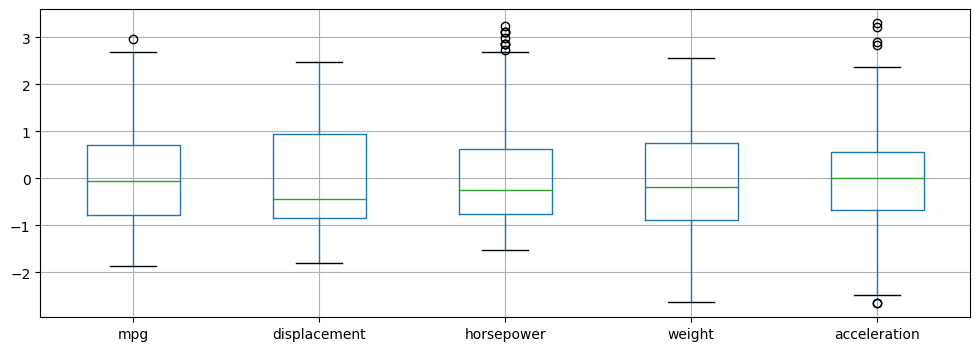

In [ ]:
standardized = ((data[numeric_feats] - data[numeric_feats].mean())
                / data[numeric_feats].std())
standardized.boxplot(column=numeric_feats, figsize= (12, 4))

<Axes: >

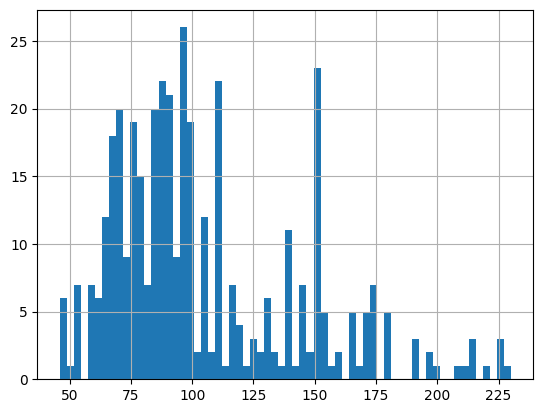

In [ ]:
data.horsepower.round().hist(bins=64)

<Axes: >

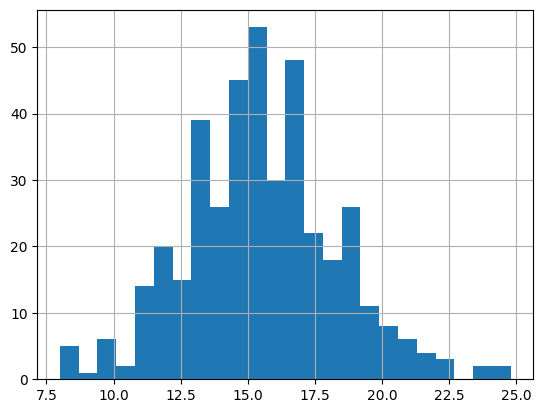

In [ ]:
data.acceleration.hist(bins=24)

<Axes: xlabel='counts'>

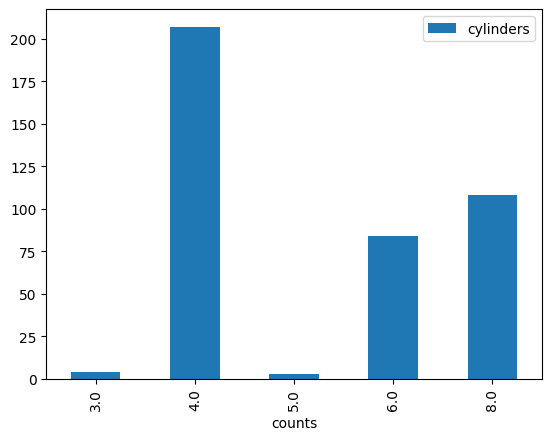

In [ ]:
(data.cylinders
     .value_counts()
     .reset_index()
     .rename(columns={'index':'counts'})
     .sort_values(by="counts")
     .plot.bar(x="counts")
)

<Axes: >

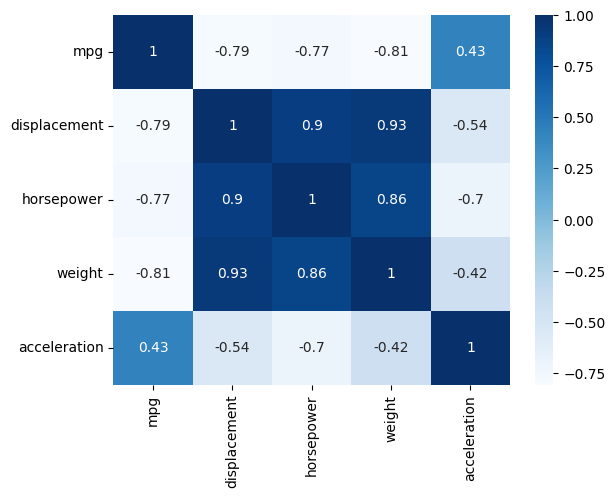

In [ ]:
import seaborn as sns

corr = data[numeric_feats].corr()
sns.heatmap(corr, cmap="Blues",annot=True)

In [ ]:
# Listing 2.6 Using Cramer's V to detect association

from scipy.stats import chi2_contingency #A

def cramerV(chi2, table): #B
    n = table.values.sum() #C
    minimum_dimension = min(table.shape)-1 #D
    result = ((chi2 / n) / minimum_dimension)**0.5 #E
    return result

deciles = pd.qcut(data.mpg, q=10, labels=False) #F
table = pd.crosstab(data.model_year, deciles) #G
chi2, p, dof, expected = chi2_contingency(observed=table) #H
print(cramerV(chi2, table)) #I

#A importing from Scipy the function for computing the chi-square test of independence
#B we prepare a function for calculating Cramer's V having as input the score chi-square test of independence and the table it has been derived from
#C we count all the elements in the table
#D we figure out the minimum dimension of the table
#E the returned result is given by the root of the chi-square score divided by the number of elements in the table and its minimum dimension
#F we transform the numeric feature mpg into deciles so they can fit into a table
#G we create the table between the model_year and mpg deciles in order to estimate their association
#H the Chi-square test of independence is computed based on the table, in return we have the score, the p-value, the degrees of freedom and the expected table based on marginal probabilities
#I by providing the chi-square score and the table itself we call the Cramer-V function we previously defined and it will return a value for CramerV: 0.8552902330916768.

0.28759294860603984


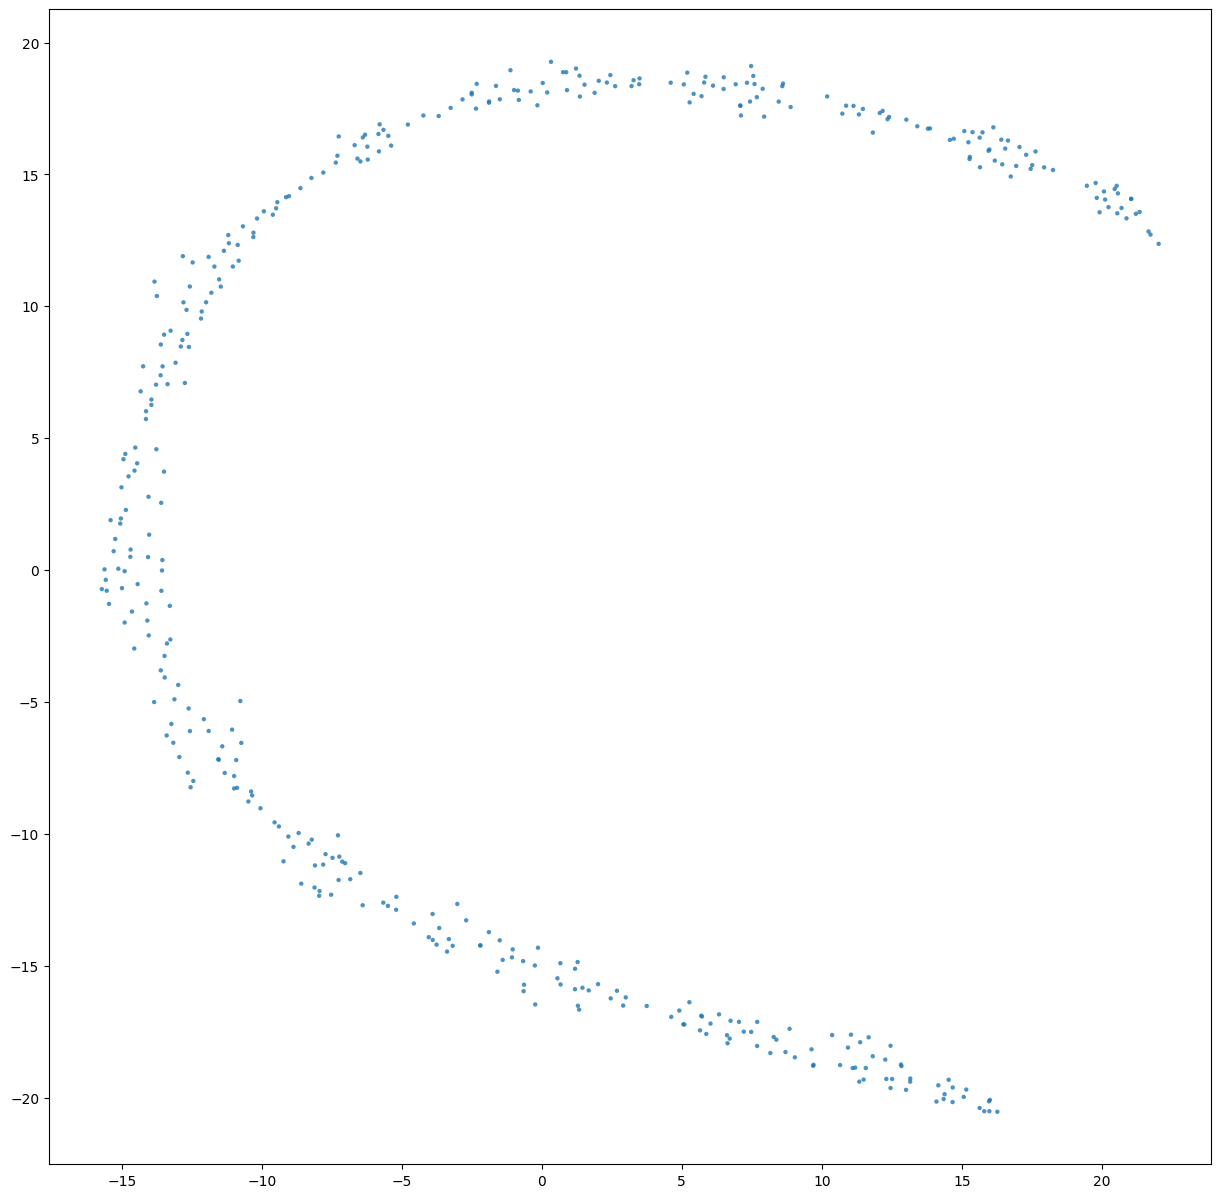

In [ ]:
# Listing 2.7 Plotting a t-SNE low dimensional projection of a dataset

from sklearn.manifold import TSNE #A
import matplotlib.pyplot as plt #B

tsne = TSNE(n_components=2, perplexity=30., init="random", learning_rate="auto",
random_state=42) #C
X = data[numeric_feats + ordinal_feats].fillna(data[numeric_feats + ordinal_feats].mean()) #D
projection_2D = tsne.fit_transform(X) #E

plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:, 0], projection_2D[:, 1],
            edgecolor='none',
            alpha=0.80,
            s=10)
plt.show() #F

#A importing the t-SNE class available in Scikit-learn
#B importing pyplot from matplotlib for chart plotting
#C t-SNE is set to project results in 2 dimensions, the other parameters are kept at their default settings
#D Only numeric and ordinal features are used, missing values are replaced with the mean because the t-SNE class require a complete input data matrix
#E By fit_transform, not only the projection is created based on the provided data but it is also applied on the data itself
#F The t-SNE transformed data is plotted as a bidimensional scatterplot